In [1]:
%pip install pip tqdm numpy torch torchvision matplotlib scikit-learn --upgrade

Note: you may need to restart the kernel to use updated packages.


In [1]:
import torch
from torch.utils.data import DataLoader
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import random as rd
from tqdm import tqdm

# if torch.backends.mps.is_available():
#     torch.set_default_device("mps")

In [2]:
t = transforms.ToTensor()

train_dataset = datasets.MNIST(root="./data", download=True, train=True, transform=t)
test_dataset = datasets.MNIST(root="./data", download=True, train=False, transform=t)

In [3]:
len(train_dataset + test_dataset)

70000

In [4]:
train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=64, shuffle=True)

In [10]:
for batch_idx, (data, targets) in enumerate(train_loader):
    # if batch_idx == 0:
    print(batch_idx, data.squeeze().size()[0], targets.size())
    # break

0 64 torch.Size([64])
1 64 torch.Size([64])
2 64 torch.Size([64])
3 64 torch.Size([64])
4 64 torch.Size([64])
5 64 torch.Size([64])
6 64 torch.Size([64])
7 64 torch.Size([64])
8 64 torch.Size([64])
9 64 torch.Size([64])
10 64 torch.Size([64])
11 64 torch.Size([64])
12 64 torch.Size([64])
13 64 torch.Size([64])
14 64 torch.Size([64])
15 64 torch.Size([64])
16 64 torch.Size([64])
17 64 torch.Size([64])
18 64 torch.Size([64])
19 64 torch.Size([64])
20 64 torch.Size([64])
21 64 torch.Size([64])
22 64 torch.Size([64])
23 64 torch.Size([64])
24 64 torch.Size([64])
25 64 torch.Size([64])
26 64 torch.Size([64])
27 64 torch.Size([64])
28 64 torch.Size([64])
29 64 torch.Size([64])
30 64 torch.Size([64])
31 64 torch.Size([64])
32 64 torch.Size([64])
33 64 torch.Size([64])
34 64 torch.Size([64])
35 64 torch.Size([64])
36 64 torch.Size([64])
37 64 torch.Size([64])
38 64 torch.Size([64])
39 64 torch.Size([64])
40 64 torch.Size([64])
41 64 torch.Size([64])
42 64 torch.Size([64])
43 64 torch.Size([64]

In [11]:
# Define the MLP architecture
class MNIST_MLP(nn.Module):
    def __init__(self):
        super(MNIST_MLP, self).__init__()
        self.ly1 = nn.Linear(784, 100)
        self.ly2 = nn.Linear(100, 50)
        self.ly3 = nn.Linear(50, 10)
        
        
    def forward(self, x):
        out = F.relu(self.ly1(x))
        out = F.relu(self.ly2(out))
        out = self.ly3(out)
        
        return out

In [18]:
# Create an instance of the MLP model
model = MNIST_MLP()

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.03)

In [19]:
loss_ar = []

In [20]:
# Train the model
model.train()
epoch = 10

for epoch in (pbar:= tqdm(range(epoch))):
    for i, (X_train_tensor, y_train_tensor) in enumerate(train_loader):
        # Get into correct shape (28*28 -> 784)
        X_train_tensor = X_train_tensor.reshape(X_train_tensor.size()[0], 784)
        
        # Forward pass: Get predictions
        y_pred = model(X_train_tensor)
        # Compute Loss
        loss = criterion(y_pred.squeeze(), y_train_tensor)
        loss_ar.append(loss.item())

        pbar.set_postfix_str(f"Loss: {loss.item()}")
        
        # Zero grad
        optimizer.zero_grad()

        # Backward pass
        loss.backward()
        optimizer.step()

100%|██████████| 10/10 [00:36<00:00,  3.64s/it, Loss: 0.010342358611524105]


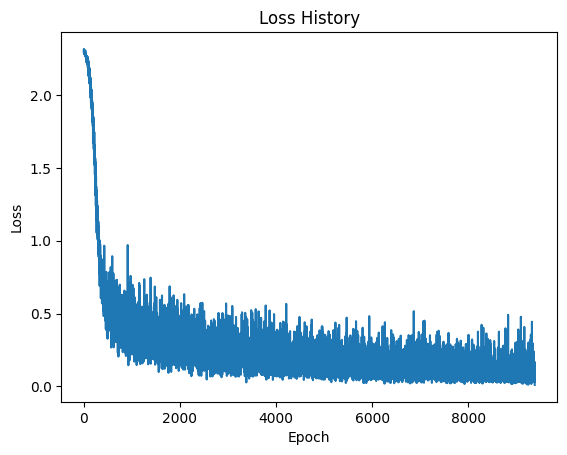

In [21]:
# Plotting the loss history
plt.plot(loss_ar)
plt.title('Loss History')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

# Run a test using predefined values

In [22]:
X_input_indx = rd.randint(0, len(test_dataset))

image, label = test_dataset[X_input_indx]
image.squeeze().shape, label

(torch.Size([28, 28]), 1)

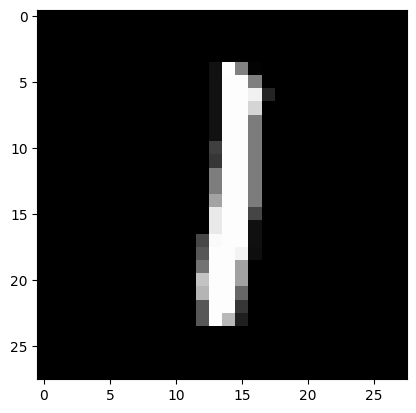

In [36]:
plt.imshow(image.squeeze(), cmap='grey')

In [24]:
X_final = torch.from_numpy(np.array([image.reshape(784)]))

model.eval()
output = (model(X_final) ** 2).sqrt().squeeze()

for i in range(10):
    print(i, (output / output.sum())[i].item() * 100)

0 25.289058685302734
1 31.463313102722168
2 2.284460887312889
3 3.690240904688835
4 8.390530943870544
5 9.010428190231323
6 8.821842819452286
7 5.943048745393753
8 4.465372860431671
9 0.6416990421712399
